In [1]:
# Importing packages to load data
import scipy.io as sio

# Load the file and parse the variables
H1 = sio.loadmat('H1.mat')
rho = H1['rho']
stim = H1['stim']

# Making them one dimensional to do further calculations
rho = rho[:,0]
stim = stim[:,0]

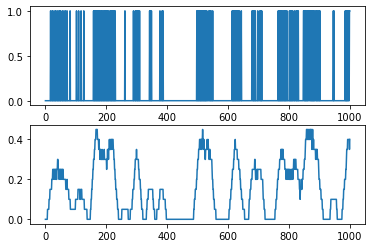

In [2]:
# Use a 21-point moving window to smooth out the spike train
from numpy.matlib import repmat
import numpy as np
import matplotlib.pyplot as plt

# kernel is 21 point moving window
kernel = repmat(.05, 1, 21).ravel()

# smooth rho with kernel
smoothRho = np.convolve(rho, kernel, 'same')

plt.figure()
plt.subplot(2,1,1)
plt.plot(rho[0:1000])
plt.subplot(2,1,2)
plt.plot(smoothRho[0:1000])

In [3]:
# load STA and create linear model
STA = np.load('STA.npy')
linearModel = np.convolve(stim, STA, 'same')

In [4]:
linearModel = (linearModel - np.mean(linearModel))/np.std(linearModel)

In [5]:
def sigmoid(x):
    return 1.0 / (1.0+np.exp(-x))

In [6]:
nonlinearModel = sigmoid(linearModel)

In [7]:
np.corrcoef(smoothRho, nonlinearModel)

array([[1.        , 0.36870828],
       [0.36870828, 1.        ]])

In [8]:
np.corrcoef(smoothRho, linearModel)

array([[1.        , 0.36375124],
       [0.36375124, 1.        ]])